# Import library

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Import data & EDA

## Products_ThoiTrangNam_rating

In [4]:
cleaned_rows = []

with open('cung_cap_HV/Products_ThoiTrangNam_rating_raw.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Skip the header
for line in lines[1:]:
    fields = line.strip().split()

    if len(fields) == 4:
        # Already clean: product_id, user_id, user, rating
        cleaned_rows.append([fields[0], fields[1], fields[3]])

    elif len(fields) > 4:
        # Assume: product_id, user_id, [username parts...], rating
        product_id = fields[0]
        user_id = fields[1]
        rating = fields[-1]  # last value is always rating
        cleaned_rows.append([product_id, user_id, rating])

# Create DataFrame
df = pd.DataFrame(cleaned_rows, columns=['product_id', 'user_id', 'rating'])

df = df.astype({'product_id': str, 'user_id': str, 'rating': int})



In [5]:
df.head()

product_id user_id  rating
0        190       1       5
1        190       2       5
2        190       3       5
3        190       4       5
4        190       5       5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024482 entries, 0 to 1024481
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   product_id  1024482 non-null  object
 1   user_id     1024482 non-null  object
 2   rating      1024482 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 23.4+ MB


In [7]:
df.isnull().sum()

product_id    0
user_id       0
rating        0
dtype: int64

In [8]:
df.duplicated().sum()

24667

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.to_csv('rating.csv',index=False)

In [11]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(col,df[col].nunique(), df[col].unique() )
    else:
        print(col,df[col].nunique())

product_id 31267
user_id 650636
rating 5 [5 4 3 2 1]


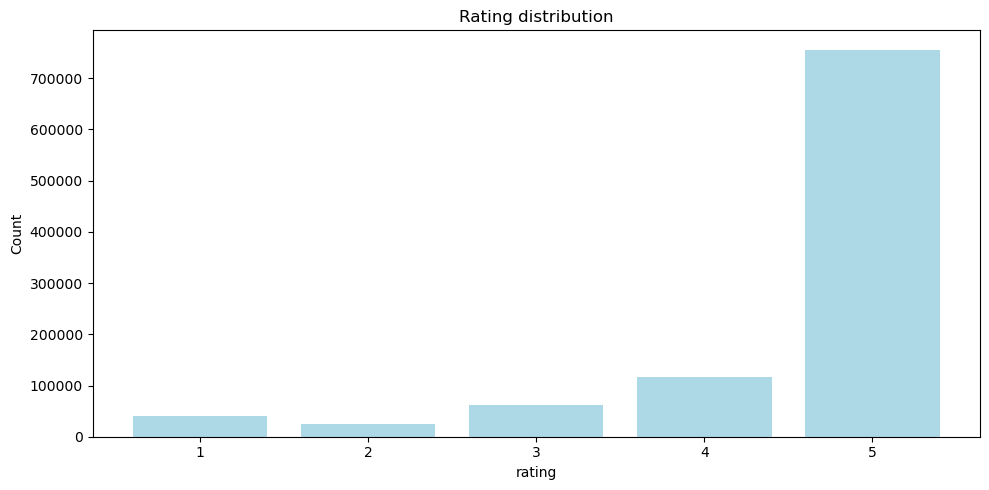

In [12]:
rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(rating_counts.index, rating_counts.values, color = 'lightblue')
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('Rating distribution')
plt.tight_layout()
plt.show()

In [13]:
df.head()

product_id user_id  rating
0        190       1       5
1        190       2       5
2        190       3       5
3        190       4       5
4        190       5       5

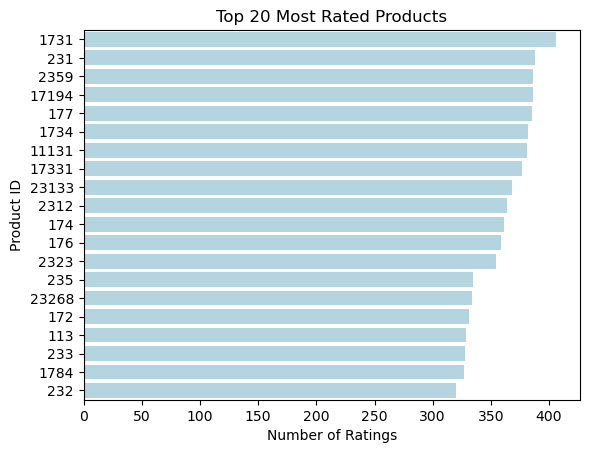

In [14]:
top_products = df.groupby('product_id').agg(count = ('product_id', 'count')).sort_values(by = 'count', ascending=False).reset_index().head(20)

sns.barplot(top_products, y = 'product_id', x = 'count', color='lightblue')
plt.title("Top 20 Most Rated Products")
plt.xlabel("Number of Ratings")
plt.ylabel("Product ID")
plt.show()

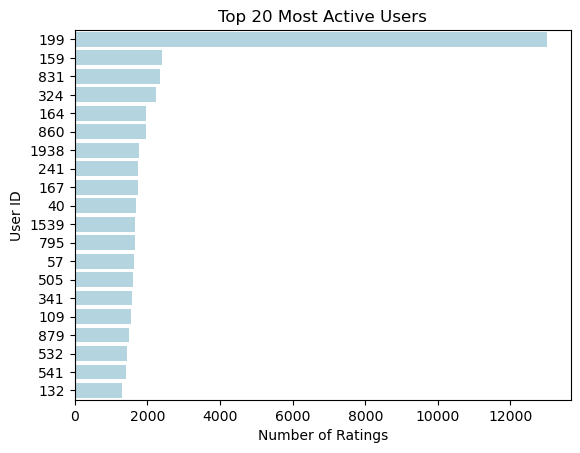

In [15]:
top_products = df.groupby('user_id').agg(count = ('user_id', 'count')).sort_values(by = 'count', ascending=False).reset_index().head(20)

sns.barplot(top_products, y = 'user_id', x = 'count', color='lightblue')
plt.title("Top 20 Most Active Users")
plt.xlabel("Number of Ratings")
plt.ylabel("User ID")
plt.show()

## Products_ThoiTrangNam_raw

In [16]:
product = pd.read_csv('cung_cap_HV/Products_ThoiTrangNam_raw.csv')

product.head()

product_id                                       product_name  \
0         190              Áo ba lỗ thun gân ,form body tôn dáng   
1         191  Áo Ba Lỗ Nam Trắng Chất Cotton Siêu Mát, Siêu Đẹp   
2         192  Áo Ba Lỗ Nam Tyasuo chất vải co dãn mát, không...   
3         193                 ÁO BA LỖ HÀNG VIỆT NAM 100% COTTON   
4         194  Áo Thun Nam Thể Thao Ba Lỗ Mẫu Mới Siêu Đẹp (B...   

         category sub_category  \
0  Thời Trang Nam     Áo Ba Lỗ   
1  Thời Trang Nam     Áo Ba Lỗ   
2  Thời Trang Nam     Áo Ba Lỗ   
3  Thời Trang Nam     Áo Ba Lỗ   
4  Thời Trang Nam     Áo Ba Lỗ   

                                                link  \
0  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...   
1  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...   
2  https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...   
3  https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...   
4  https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...   

                                               image    price  rating  \
0  https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...  86250.0     4.9   
1  https://cf.shopee.vn/file/c7ea4c6574dc79be6b26...  26800.0     4.9   
2  https://cf.shopee.vn/file/6f93bcda10efe374f8cc...  39500.0     4.8   
3  https://cf.shopee.vn/file/1d7ed5e34bff8bc8b49a...  16500.0     4.8   
4                                                NaN  45000.0     4.8   

                                         description  
0  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...  
1  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nXu...  
2  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nTh...  
3  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...  
4  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...

In [17]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49663 entries, 0 to 49662
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    49663 non-null  int64  
 1   product_name  49663 non-null  object 
 2   category      49663 non-null  object 
 3   sub_category  49663 non-null  object 
 4   link          49663 non-null  object 
 5   image         36443 non-null  object 
 6   price         49663 non-null  float64
 7   rating        49663 non-null  float64
 8   description   48700 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [18]:
product['product_id'] = product['product_id'].astype(str)

In [19]:
product.columns

Index(['product_id', 'product_name', 'category', 'sub_category', 'link',
       'image', 'price', 'rating', 'description'],
      dtype='object')

In [20]:
num_cols = ['price', 'rating']
cat_cols = ['product_id', 'product_name', 'category', 'sub_category', 'link',
       'image', 'description']

count    4.966300e+04
mean     2.336831e+05
std      9.853191e+05
min      0.000000e+00
25%      6.900000e+04
50%      1.419000e+05
75%      2.685710e+05
max      1.000000e+08
Name: price, dtype: float64


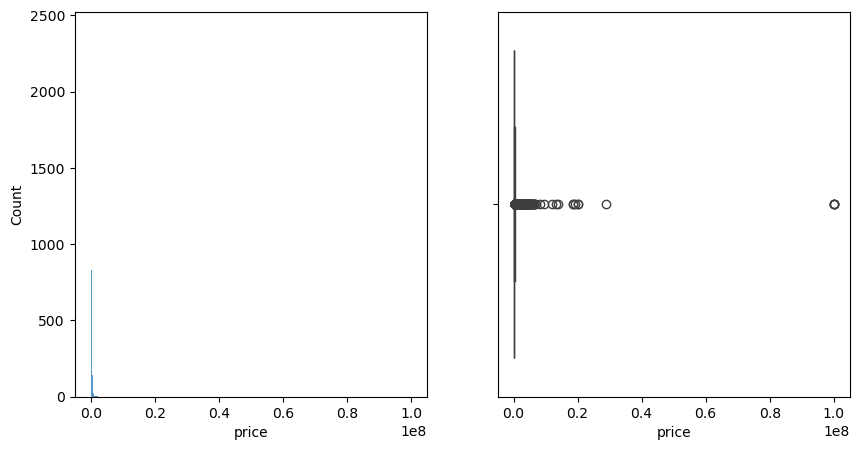

count    49663.00000
mean         3.08549
std          2.33958
min          0.00000
25%          0.00000
50%          4.80000
75%          5.00000
max          5.00000
Name: rating, dtype: float64


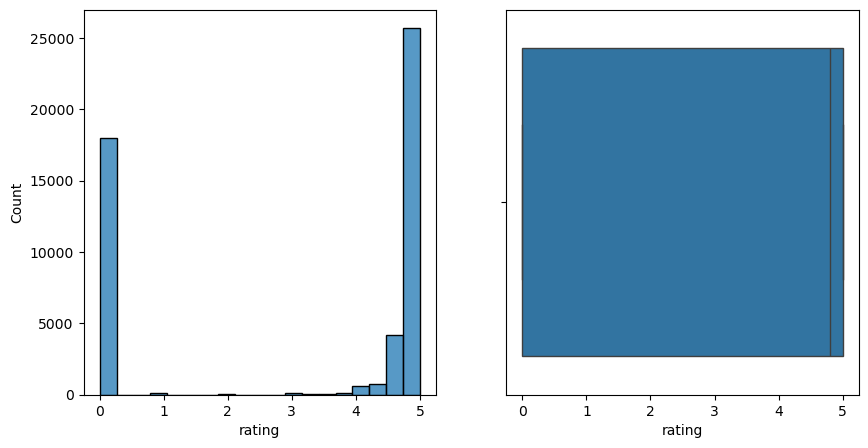

In [21]:
for col in num_cols:
    
    print(product[col].describe())
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(product, x = col)
    
    plt.subplot(1,2,2)
    sns.boxplot(product, x=col)
    
    plt.show()

In [22]:
for col in cat_cols:
    if product[col].nunique() < 20:
        print(col, product[col].nunique(), product[col].unique() )
    else:
        print(col, product[col].nunique())

product_id 49653
product_name 47103
category 1 ['Thời Trang Nam']
sub_category 17 ['Áo Ba Lỗ' 'Áo Hoodie, Áo Len & Áo Nỉ' 'Áo Khoác' 'Áo Vest và Blazer'
 'Áo' 'Cà vạt & Nơ cổ' 'Đồ Bộ' 'Đồ Hóa Trang' 'Đồ Lót' 'Đồ Ngủ' 'Khác'
 'Kính Mắt Nam' 'Quần Dài/Quần Âu' 'Quần Jeans' 'Quần Short'
 'Trang Phục Truyền Thống' 'Vớ/Tất']
link 49653
image 35191
description 45071


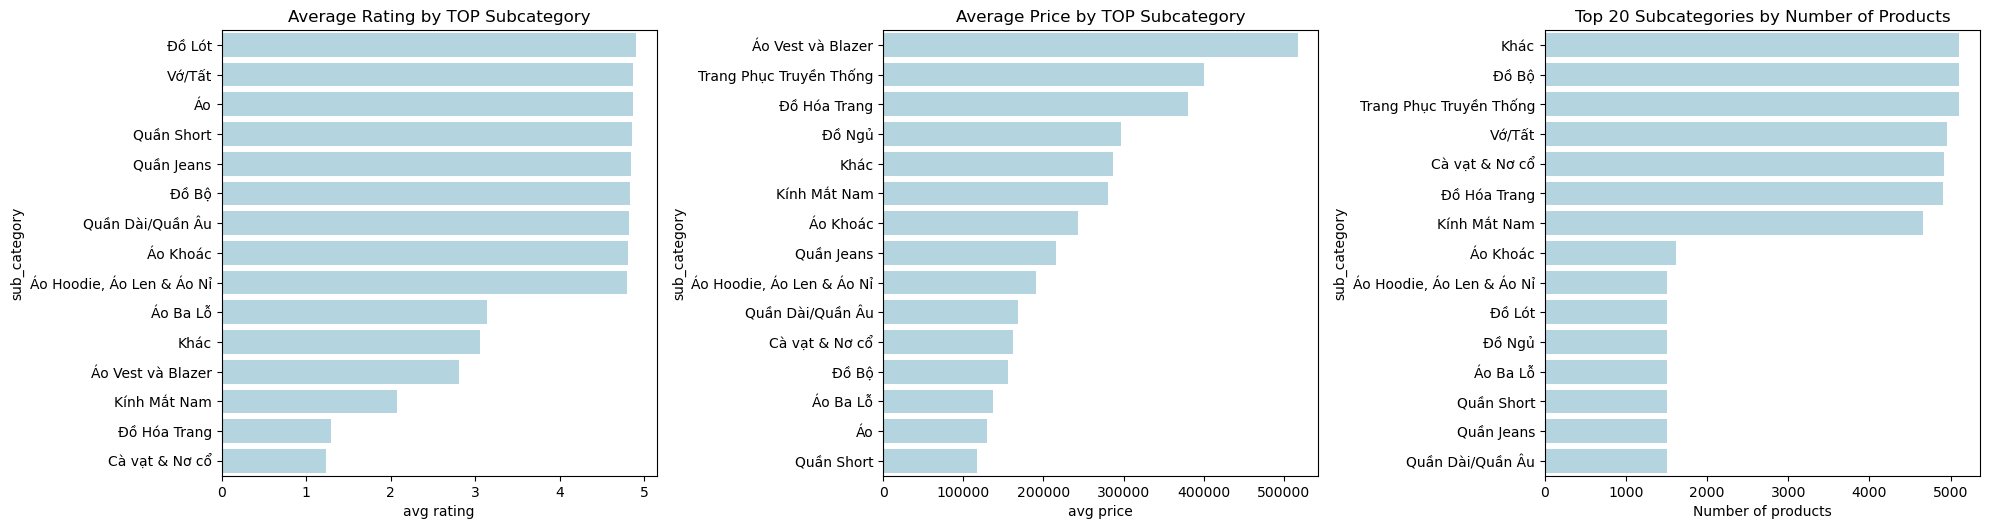

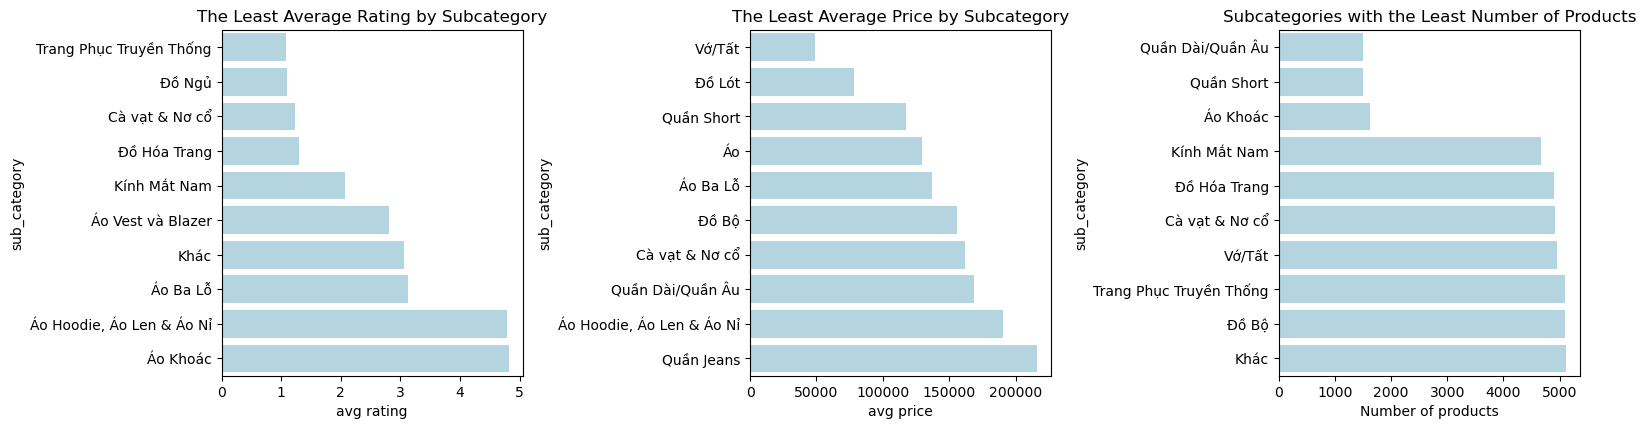

In [23]:
most_avg_rating = product.groupby('sub_category').agg(avg = ('rating', 'mean')).reset_index().sort_values(by = 'avg', ascending=False).head(15)
most_avg_price = product.groupby('sub_category').agg(avg = ('price', 'mean')).reset_index().sort_values(by = 'avg', ascending=False).head(15)
most_category = product.groupby('sub_category').agg(count = ('price', 'count')).reset_index().sort_values(by = 'count', ascending=False).head(15)

least_avg_rating = product.groupby('sub_category').agg(avg = ('rating', 'mean')).reset_index().sort_values(by = 'avg', ascending=True).head(10)
least_avg_price = product.groupby('sub_category').agg(avg = ('price', 'mean')).reset_index().sort_values(by = 'avg', ascending=True).head(10)
least_category = product.groupby('sub_category').agg(count = ('price', 'count')).reset_index().sort_values(by = 'count', ascending=True).tail(10)


plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(most_avg_rating, x = 'avg', y = 'sub_category', color = 'lightblue')
plt.xlabel("avg rating")
plt.ylabel("sub_category")
plt.title('Average Rating by TOP Subcategory')

plt.subplot(2,3,2)
sns.barplot(most_avg_price, x = 'avg', y = 'sub_category', color = 'lightblue')
plt.xlabel("avg price")
plt.ylabel("sub_category")
plt.title('Average Price by TOP Subcategory')

plt.subplot(2,3,3)
sns.barplot(most_category, x = 'count', y = 'sub_category', color = 'lightblue')
plt.xlabel("Number of products")
plt.ylabel("sub_category")
plt.title('Top 20 Subcategories by Number of Products')

plt.tight_layout()

plt.figure(figsize=(16,8))
plt.subplot(2,3,4)
sns.barplot(least_avg_rating, x = 'avg', y = 'sub_category', color = 'lightblue')
plt.xlabel("avg rating")
plt.ylabel("sub_category")
plt.title('The Least Average Rating by Subcategory')

plt.subplot(2,3,5)
sns.barplot(least_avg_price, x = 'avg', y = 'sub_category', color = 'lightblue')
plt.xlabel("avg price")
plt.ylabel("sub_category")
plt.title('The Least Average Price by Subcategory')

plt.subplot(2,3,6)
sns.barplot(least_category, x = 'count', y = 'sub_category', color = 'lightblue')
plt.xlabel("Number of products")
plt.ylabel("sub_category")
plt.title('Subcategories with the Least Number of Products')

plt.tight_layout()
plt.show()

# Merge data

In [24]:
merge = pd.merge(df, product, left_on = 'product_id', right_on='product_id')
merge.head()

product_id user_id  rating_x                           product_name  \
0        190       1         5  Áo ba lỗ thun gân ,form body tôn dáng   
1        190       2         5  Áo ba lỗ thun gân ,form body tôn dáng   
2        190       3         5  Áo ba lỗ thun gân ,form body tôn dáng   
3        190       4         5  Áo ba lỗ thun gân ,form body tôn dáng   
4        190       5         5  Áo ba lỗ thun gân ,form body tôn dáng   

         category sub_category  \
0  Thời Trang Nam     Áo Ba Lỗ   
1  Thời Trang Nam     Áo Ba Lỗ   
2  Thời Trang Nam     Áo Ba Lỗ   
3  Thời Trang Nam     Áo Ba Lỗ   
4  Thời Trang Nam     Áo Ba Lỗ   

                                                link  \
0  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...   
1  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...   
2  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...   
3  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...   
4  https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...   

                                               image    price  rating_y  \
0  https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...  86250.0       4.9   
1  https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...  86250.0       4.9   
2  https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...  86250.0       4.9   
3  https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...  86250.0       4.9   
4  https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...  86250.0       4.9   

                                         description  
0  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...  
1  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...  
2  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...  
3  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...  
4  Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...

In [25]:
merge.duplicated().sum()

0

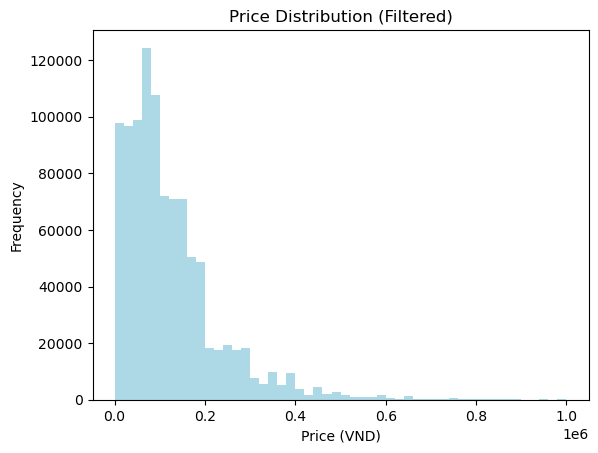

In [26]:
merge[merge['price'] < 1000000]['price'].plot(kind='hist', bins=50, color='lightblue')
plt.title('Price Distribution (Filtered)')
plt.xlabel('Price (VND)')
plt.show()

In [27]:
top_users_rating = merge.groupby('user_id').agg(count = ('product_id', 'count')).sort_values(by = 'count', ascending=False).reset_index().head(20)


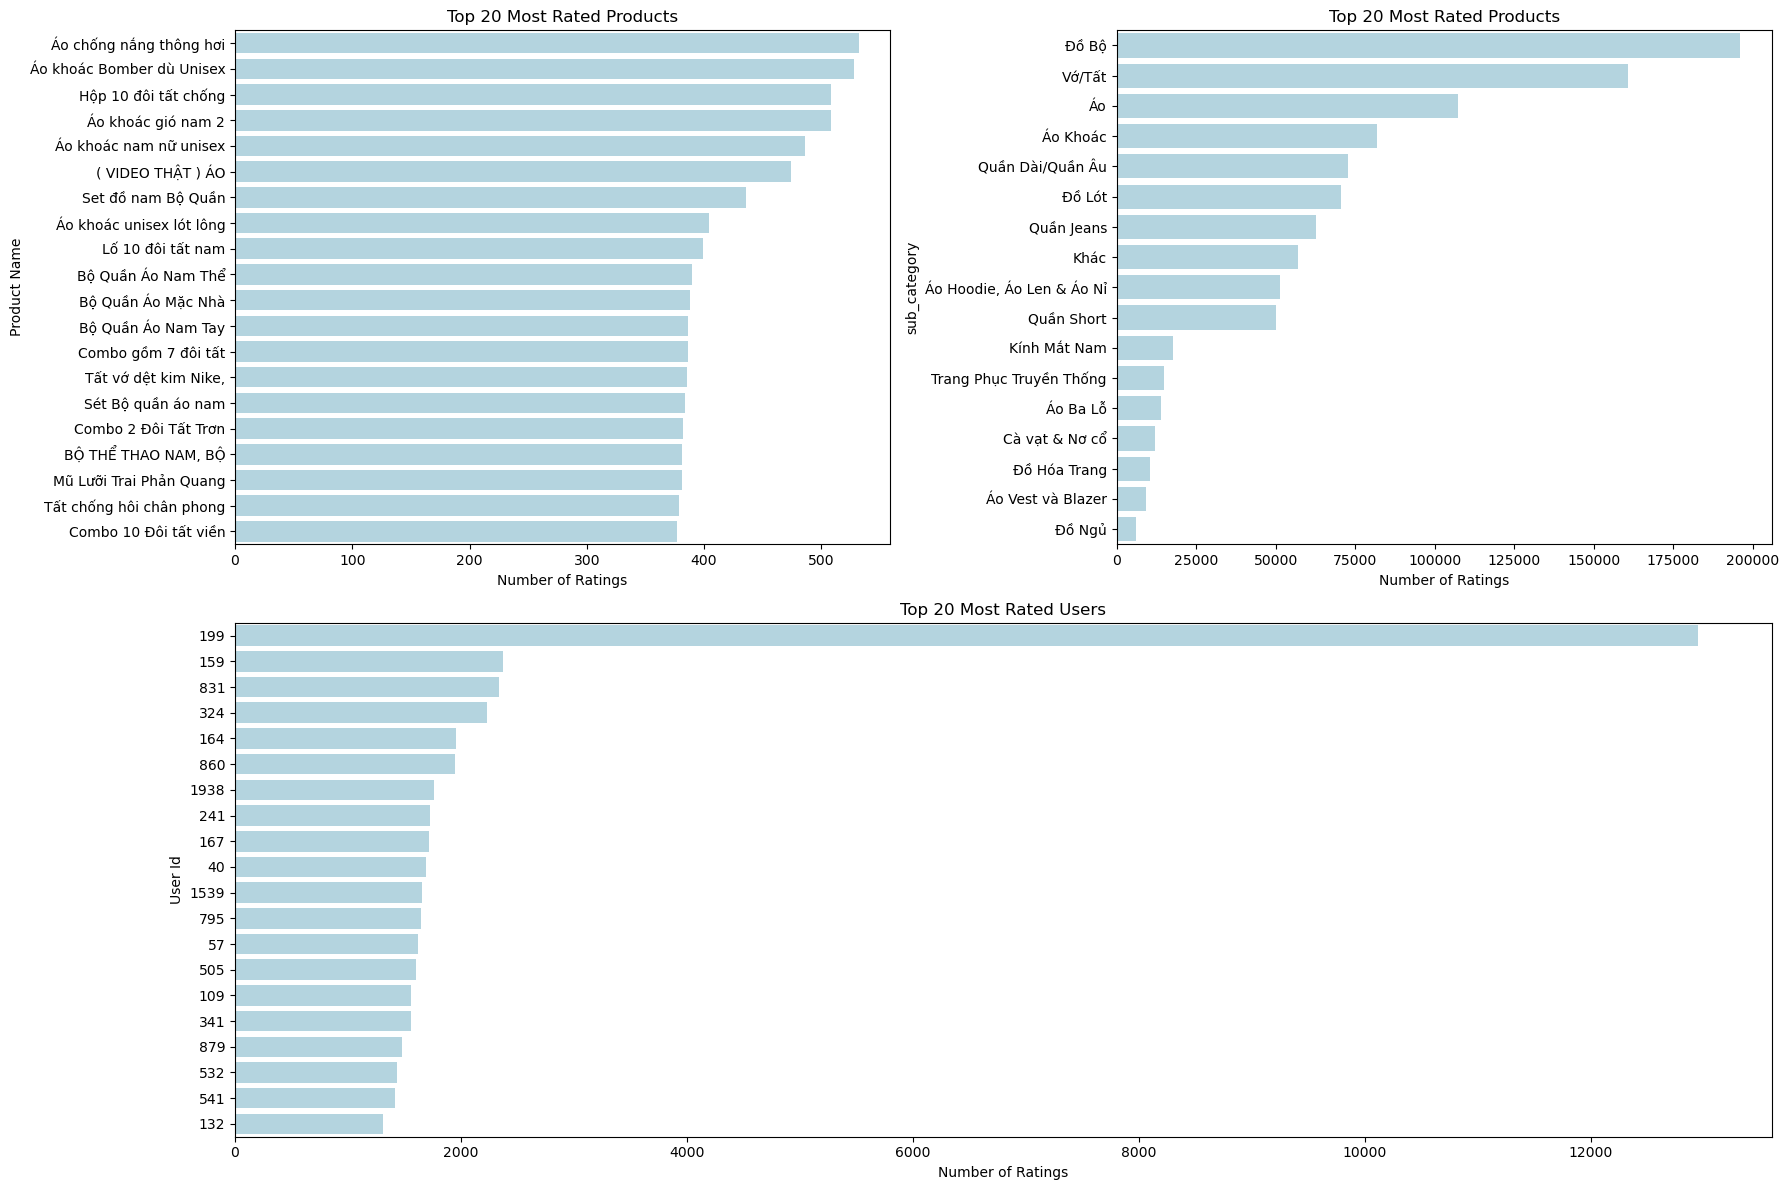

In [28]:
top_products = merge.groupby('product_name').agg(count = ('product_id', 'count')).sort_values(by = 'count', ascending=False).reset_index().head(20)
top_products['short_name'] = top_products['product_name'].apply(
    lambda x: ' '.join(x.split()[:5])
)

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.barplot(top_products, y = 'short_name', x = 'count', color='lightblue')
plt.title("Top 20 Most Rated Products")
plt.xlabel("Number of Ratings")
plt.ylabel("Product Name")

plt.subplot(2,2,2)
top_products_sub = merge.groupby('sub_category').agg(count = ('product_id', 'count')).sort_values(by = 'count', ascending=False).reset_index().head(20)
sns.barplot(top_products_sub, y = 'sub_category', x = 'count', color='lightblue')
plt.title("Top 20 Most Rated Products")
plt.xlabel("Number of Ratings")
plt.ylabel("sub_category")

plt.subplot(2,1,2)
top_users_rating = merge.groupby('user_id').agg(count = ('product_id', 'count')).sort_values(by = 'count', ascending=False).reset_index().head(20)
sns.barplot(top_users_rating, y = 'user_id', x = 'count', color='lightblue')
plt.title("Top 20 Most Rated Users")
plt.xlabel("Number of Ratings")
plt.ylabel("User Id")


plt.tight_layout()
plt.show()

# Check sparsity

In [29]:
users  = df['user_id'].nunique()
products  = df['product_id'].nunique()
numerator = df['user_id'].count()

print(users, products, numerator)

650636 31267 999815


In [30]:
denominator = users * products 
denominator

20343435812

In [31]:
sparsity = 1 - (numerator*1.0/ denominator)
print('sparsity: ', sparsity)

sparsity:  0.9999508531887514


# Build model

In [32]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV

In [33]:
df[['user_id', 'product_id', 'rating']].head()

user_id product_id  rating
0       1        190       5
1       2        190       5
2       3        190       5
3       4        190       5
4       5        190       5

In [34]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [35]:
param_grid = {
    "n_factors": [25, 40, 55],  # default 100
    "n_epochs": [10, 20],  # default 20
    "lr_all": [0.005, 0.025, 0.125],  # learning rate for all parameters. Default 0.005
    "reg_all": [0.08, 0.16, 0.32],  # regularization term for all parameters. Default 0.02
    "random_state": [0],
}

grid_search = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"],
    cv=3,  
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

grid_search.fit(data)

pd.DataFrame.from_dict(grid_search.cv_results)[[
    "mean_test_rmse", "mean_test_mae", "param_n_factors",
    "param_n_epochs", "param_lr_all", "param_reg_all"
]].sort_values("mean_test_rmse")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  4.1min finished


mean_test_rmse  mean_test_mae  param_n_factors  param_n_epochs  \
13        0.878691       0.557702               25              20   
4         0.878979       0.561533               25              10   
31        0.879085       0.558701               40              20   
22        0.879171       0.562389               40              10   
3         0.879251       0.554901               25              10   
40        0.879386       0.563225               55              10   
49        0.879438       0.559689               55              20   
21        0.880015       0.556193               40              10   
39        0.880620       0.557546               55              10   
9         0.881785       0.568814               25              20   
27        0.882127       0.569664               40              20   
45        0.882412       0.570459               55              20   
10        0.882891       0.574565               25              20   
28        0.883098       0.575226               40              20   
46        0.883298       0.575858               55              20   
5         0.883651       0.574883               25              10   
23        0.883808       0.575471               40              10   
14        0.883876       0.572106               25              20   
41        0.883972       0.576019               55              10   
32        0.884105       0.572661               40              20   
50        0.884324       0.573183               55              20   
48        0.884348       0.556376               55              20   
30        0.884574       0.555115               40              20   
12        0.885006       0.553889               25              20   
0         0.886099       0.588161               25              10   
18        0.886397       0.588646               40              10   
36        0.886643       0.589059               55              10   
11        0.887139       0.585448               25              20   
29        0.887295       0.585935               40              20   
1         0.887329       0.592284               25              10   
47        0.887460       0.586397               55              20   
19        0.887545       0.592685               40              10   
37        0.887737       0.593031               55              10   
42        0.890536       0.562486               55              10   
2         0.891426       0.600185               25              10   
20        0.891582       0.600499               40              10   
38        0.891734       0.600778               55              10   
24        0.891743       0.561219               40              10   
43        0.892530       0.567067               55              10   
25        0.892663       0.566018               40              10   
7         0.892935       0.565017               25              10   
6         0.893791       0.560907               25              10   
51        0.897003       0.568321               55              20   
33        0.897849       0.567456               40              20   
15        0.899574       0.567407               25              20   
8         0.900818       0.580056               25              10   
26        0.901040       0.580483               40              10   
44        0.901229       0.580856               55              10   
52        0.902006       0.573867               55              20   
34        0.902137       0.573216               40              20   
16        0.902420       0.572555               25              20   
17        0.910793       0.587110               25              20   
35        0.911035       0.587366               40              20   
53        0.911164       0.587556               55              20   

    param_lr_all  param_reg_all  
13         0.025           0.16  
4          0.025           0.16  
31         0.025           0.16  
22         0.025 

In [36]:
best_model = grid_search.best_estimator["rmse"]

In [37]:
# predict a user id and item id
best_model.predict(uid=10, iid=100)

Prediction(uid=10, iid=100, r_ui=None, est=4.5231127758635346, details={'was_impossible': False})

In [38]:
# test model
predictions = best_model.test(test)
accuracy.rmse(predictions)

RMSE: 0.6441


0.6441066880806186

In [39]:
pred = best_model.predict('45', '100', r_ui=4, verbose=True)

user: 45         item: 100        r_ui = 4.00   est = 4.44   {'was_impossible': False}


In [40]:
# retrain on all data to generate recommendations
full_trainset = data.build_full_trainset()
best_model.fit(full_trainset)

In [41]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [42]:
top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

11129 ['19805']
245752 ['2621', '231893']
255887 ['23246']
550680 ['162006']
44234 ['20972']
75518 ['21362']
415127 ['11220']
369012 ['25604']
535314 ['14612']
218907 ['231123']
419062 ['11835']
226933 ['231734', '231304']
371420 ['25682']
400543 ['11449']
253624 ['23210']
24968 ['171195']
517697 ['14171']
1706 ['25669', '2468', '181375', '17904', '172062', '171504', '174674', '251475', '23107', '17292']
511791 ['1438']
8890 ['19229']
162 ['15597', '1953', '171516', '171427', '251438', '251157', '171317', '141151', '172553', '1970']
504242 ['15687']
108139 ['227']
507781 ['15994']
2172 ['171679', '173384', '174360', '23668', '172932', '21838', '11409', '17639', '2426', '111515']
196228 ['233']
185564 ['18983']
470428 ['17189', '13654']
222961 ['231217']
231709 ['231415']
304859 ['234621']
2210 ['11502', '25442', '14588', '19530', '172544', '11339', '16532', '17316', '141050', '233992']
82151 ['21511']
127440 ['18141']
712 ['2680', '171050', '24280', '25687', '211134', '171363', '232157

In [43]:
best_model.predict(uid='45', iid='123')

Prediction(uid='45', iid='123', r_ui=None, est=5, details={'was_impossible': False})

In [44]:
top_n_rows = []

for uid, user_ratings in top_n.items():
    for (iid, est_rating) in user_ratings:
        top_n_rows.append({
            'user_id': uid,
            'product_id': iid,
            'predicted_rating': round(est_rating, 2)
        })

In [45]:
top_n_df = pd.DataFrame(top_n_rows)

In [46]:
top_n_df.head()

user_id product_id  predicted_rating
0   11129      19805              4.74
1  245752       2621              5.00
2  245752     231893              4.99
3  255887      23246              4.59
4  550680     162006              4.89

In [47]:
top_n_df = top_n_df.merge(product[['product_id', 'product_name', 'sub_category']], on='product_id', how='left')

In [48]:
top_n_df[top_n_df['user_id']=='30'][['product_name','sub_category','predicted_rating']]

product_name  \
14186       (CÓ SẴN) Áo khoác kimono haori happi hạc hoa   
14187  ÁO HOODIE NỈ BÔNG SIÊU DÀY IN HÌNH ĐỒNG TIỀN N...   
14188  Quần Đùi Nam Thể Thao Dáng Ngố - Quần Short Na...   
14189  Vớ thể thao màu đen/ trắng trơn thiết kế đơn giản   
14190  Đôi tất cổ ngắn màu trơn 3 màu tùy chọn thời t...   
14191  Tất thoáng khí thấm mồ hôi màu đen phong cách ...   
14192      [A3] Áo khoác dù áo gió cặp nam nữ Loca 2 lớp   
14193  Cà Vạt Họa Tiết Sọc Chéo Nhiều Kiểu Thời Trang...   
14194  Quần Jogger Kaki Nam Nữ Túi Hộp Unisex Streetstye   
14195                    Tất , vớ Naiiki thể thao cổ cao   

                    sub_category  predicted_rating  
14186                   Áo Khoác              5.00  
14187  Áo Hoodie, Áo Len & Áo Nỉ              5.00  
14188                 Quần Short              5.00  
14189                     Vớ/Tất              5.00  
14190                     Vớ/Tất              4.91  
14191                     Vớ/Tất              4.85  
14192                      Đồ Bộ              4.83  
14193             Cà vạt & Nơ cổ              4.83  
14194           Quần Dài/Quần Âu              4.75  
14195                     Vớ/Tất              4.71

In [54]:
top_n_df[top_n_df['user_id']=='200'][['product_name','sub_category','predicted_rating']]

product_name  \
812  Bộ Quần Áo Đũi BATman Combo Áo Đũi Cổ bẻ + 1 Q...   
813       HỘP 5 ĐÔI TẤT CỔ NGĂN TK -THOÁNG MÁT MỀM MỊN   
814  Tất nam - vớ nam cổ ngắn Bizsock chính hãng Bi...   
815  [Mã WABRMM505 giảm 12% đơn 250K] Vớ Unisex 100...   
816                   Áo Nhóm - Ăn chơi là phải có hội   
817  áo dài trơn nam 18 màu kèm ngọc bội ảnh thật s...   
818                          Cà Vạt Thời Trang Cho Nam   
819  Vớ cổ ngắn Giordano 01156016 màu trơn cho nam ...   
820  Quần short jean nam cao cấp mẫu mới chất vải b...   
821  Combo 5 vớ nam nữ cổ ngắn, tất zara man co giã...   

                sub_category  predicted_rating  
812  Trang Phục Truyền Thống              4.96  
813                   Vớ/Tất              4.95  
814                   Vớ/Tất              4.93  
815                   Vớ/Tất              4.86  
816                    Đồ Bộ              4.85  
817  Trang Phục Truyền Thống              4.80  
818           Cà vạt & Nơ cổ              4.78  
819                   Vớ/Tất              4.78  
820               Quần Short              4.75  
821                   Vớ/Tất              4.73